In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json

In [2]:
product_details = pd.read_csv(r"C:\Users\HP PC\Downloads\product_details.csv", index_col = 0)

In [3]:
product_details

,product_id,price,product_name,category_id,segment_id,style_id,category_name,segment_name,style_name
0,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
1,e83aa3,32,Black Straight Jeans - Womens,1,3,8,Womens,Jeans,Black Straight
2,e31d39,10,Cream Relaxed Jeans - Womens,1,3,9,Womens,Jeans,Cream Relaxed
3,d5e9a6,23,Khaki Suit Jacket - Womens,1,4,10,Womens,Jacket,Khaki Suit
4,72f5d4,19,Indigo Rain Jacket - Womens,1,4,11,Womens,Jacket,Indigo Rain
5,9ec847,54,Grey Fashion Jacket - Womens,1,4,12,Womens,Jacket,Grey Fashion
6,5d267b,40,White Tee Shirt - Mens,2,5,13,Mens,Shirt,White Tee
7,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up
8,2a2353,57,Blue Polo Shirt - Mens,2,5,15,Mens,Shirt,Blue Polo
9,f084eb,36,Navy Solid Socks - Mens,2,6,16,Mens,Socks,Navy Solid


In [4]:
product_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     12 non-null     object
 1   price          12 non-null     int64 
 2   product_name   12 non-null     object
 3   category_id    12 non-null     int64 
 4   segment_id     12 non-null     int64 
 5   style_id       12 non-null     int64 
 6   category_name  12 non-null     object
 7   segment_name   12 non-null     object
 8   style_name     12 non-null     object
dtypes: int64(4), object(5)
memory usage: 960.0+ bytes


In [5]:
product_sales = pd.read_csv(r"C:\Users\HP PC\Downloads\sales (1).csv", index_col = 0)

In [6]:
product_sales

,prod_id,qty,price,discount,member,txn_id,start_txn_time
0,c4a632,4,13,17,t,54f307,2021-02-13 01:59:43.296
1,5d267b,4,40,17,t,54f307,2021-02-13 01:59:43.296
2,b9a74d,4,17,17,t,54f307,2021-02-13 01:59:43.296
3,2feb6b,2,29,17,t,54f307,2021-02-13 01:59:43.296
4,c4a632,5,13,21,t,26cc98,2021-01-19 01:39:00.3456
...,...,...,...,...,...,...,...
15090,9ec847,1,54,13,t,f15ab3,2021-03-20 12:01:22.944
15091,2a2353,3,57,13,t,f15ab3,2021-03-20 12:01:22.944
15092,e83aa3,5,32,1,t,93620b,2021-03-01 07:11:24.6624
15093,d5e9a6,2,23,1,t,93620b,2021-03-01 07:11:24.6624


In [7]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15095 entries, 0 to 15094
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   prod_id         15095 non-null  object
 1   qty             15095 non-null  int64 
 2   price           15095 non-null  int64 
 3   discount        15095 non-null  int64 
 4   member          15095 non-null  object
 5   txn_id          15095 non-null  object
 6   start_txn_time  15095 non-null  object
dtypes: int64(3), object(4)
memory usage: 943.4+ KB


In [8]:
product_sales['start_txn_time'] = pd.to_datetime(product_sales['start_txn_time'], errors='coerce')

In [9]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15095 entries, 0 to 15094
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   prod_id         15095 non-null  object        
 1   qty             15095 non-null  int64         
 2   price           15095 non-null  int64         
 3   discount        15095 non-null  int64         
 4   member          15095 non-null  object        
 5   txn_id          15095 non-null  object        
 6   start_txn_time  15085 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 943.4+ KB


In [10]:
product_hie = pd.read_csv(r"C:\Users\HP PC\Downloads\product_hierarchy.csv", index_col = 0)

In [11]:
product_hie

,id,parent_id,level_text,level_name
0,1,NaN,Womens,Category
1,2,NaN,Mens,Category
2,3,1.0,Jeans,Segment
3,4,1.0,Jacket,Segment
4,5,2.0,Shirt,Segment
5,6,2.0,Socks,Segment
6,7,3.0,Navy Oversized,Style
7,8,3.0,Black Straight,Style
8,9,3.0,Cream Relaxed,Style
9,10,4.0,Khaki Suit,Style


In [12]:
product_hie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          18 non-null     int64  
 1   parent_id   16 non-null     float64
 2   level_text  18 non-null     object 
 3   level_name  18 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 720.0+ bytes


In [13]:
product_price = pd.read_csv(r"C:\Users\HP PC\Downloads\product_prices.csv", index_col = 0)

In [14]:
product_price

,id,product_id,price
0,7,c4a632,13
1,8,e83aa3,32
2,9,e31d39,10
3,10,d5e9a6,23
4,11,72f5d4,19
5,12,9ec847,54
6,13,5d267b,40
7,14,c8d436,10
8,15,2a2353,57
9,16,f084eb,36


In [15]:
product_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12 non-null     int64 
 1   product_id  12 non-null     object
 2   price       12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 384.0+ bytes


# High Level Sales Analysis :


### 1. What was the total quantity sold for all products?


In [16]:
product_sales

,prod_id,qty,price,discount,member,txn_id,start_txn_time
0,c4a632,4,13,17,t,54f307,2021-02-13 01:59:43.296000
1,5d267b,4,40,17,t,54f307,2021-02-13 01:59:43.296000
2,b9a74d,4,17,17,t,54f307,2021-02-13 01:59:43.296000
3,2feb6b,2,29,17,t,54f307,2021-02-13 01:59:43.296000
4,c4a632,5,13,21,t,26cc98,2021-01-19 01:39:00.345600
...,...,...,...,...,...,...,...
15090,9ec847,1,54,13,t,f15ab3,2021-03-20 12:01:22.944000
15091,2a2353,3,57,13,t,f15ab3,2021-03-20 12:01:22.944000
15092,e83aa3,5,32,1,t,93620b,2021-03-01 07:11:24.662400
15093,d5e9a6,2,23,1,t,93620b,2021-03-01 07:11:24.662400


In [17]:
merge1 = pd.merge(product_sales, product_details, left_on='prod_id',
                  right_on='product_id', how='inner')

In [18]:
merge1

,prod_id,qty,price_x,discount,member,txn_id,start_txn_time,product_id,price_y,product_name,category_id,segment_id,style_id,category_name,segment_name,style_name
0,c4a632,4,13,17,t,54f307,2021-02-13 01:59:43.296000,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
1,c4a632,5,13,21,t,26cc98,2021-01-19 01:39:00.345600,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
2,c4a632,1,13,21,f,ef648d,2021-01-27 02:18:17.164800,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
3,c4a632,2,13,23,t,fba96f,2021-03-03 00:32:56.054400,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
4,c4a632,5,13,11,t,4e9268,2021-01-23 14:18:54.057600,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15090,c8d436,1,10,20,t,359542,2021-03-02 07:12:38.880000,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up
15091,c8d436,2,10,13,f,f905a2,2021-03-07 19:15:40.233600,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up
15092,c8d436,1,10,6,t,ba59c1,2021-02-08 12:26:55.507200,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up
15093,c8d436,3,10,12,f,15cfae,2021-02-09 22:01:44.659200,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up


In [19]:
merge1['quantity_sold'] = merge1['price_x'] * merge1['qty'] - merge1['discount']

In [20]:
merge1

,prod_id,qty,price_x,discount,member,txn_id,start_txn_time,product_id,price_y,product_name,category_id,segment_id,style_id,category_name,segment_name,style_name,quantity_sold
0,c4a632,4,13,17,t,54f307,2021-02-13 01:59:43.296000,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,35
1,c4a632,5,13,21,t,26cc98,2021-01-19 01:39:00.345600,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,44
2,c4a632,1,13,21,f,ef648d,2021-01-27 02:18:17.164800,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,-8
3,c4a632,2,13,23,t,fba96f,2021-03-03 00:32:56.054400,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,3
4,c4a632,5,13,11,t,4e9268,2021-01-23 14:18:54.057600,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15090,c8d436,1,10,20,t,359542,2021-03-02 07:12:38.880000,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,-10
15091,c8d436,2,10,13,f,f905a2,2021-03-07 19:15:40.233600,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,7
15092,c8d436,1,10,6,t,ba59c1,2021-02-08 12:26:55.507200,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,4
15093,c8d436,3,10,12,f,15cfae,2021-02-09 22:01:44.659200,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,18


In [21]:
total_quantity_sold = merge1.groupby('product_name')['quantity_sold'].sum().sum()

In [22]:
print(f"Total quantity sold for all products: {total_quantity_sold}")

Total quantity sold for all products: 1106753


#### with visualization :

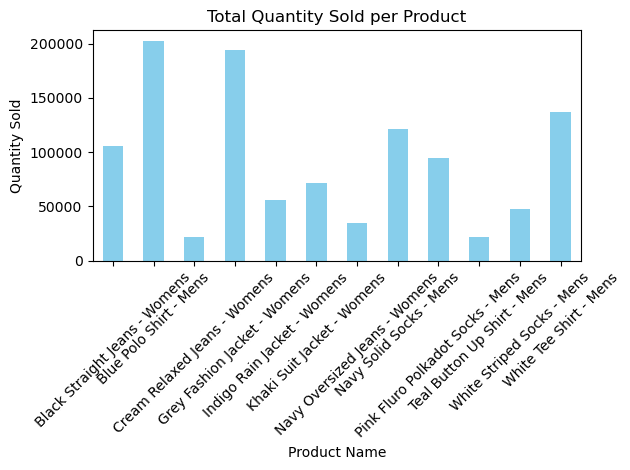

In [23]:
total_quantity_sold_per_product = merge1.groupby('product_name')['quantity_sold'].sum()
total_quantity_sold_per_product.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold per Product')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. What is the total generated revenue for all products before discounts?


In [24]:
merge1['revenue_before_discount'] = merge1['price_x'] * merge1['qty']

In [25]:
merge1['revenue_before_discount']

0        52
1        65
2        13
3        26
4        65
         ..
15090    10
15091    20
15092    10
15093    30
15094    10
Name: revenue_before_discount, Length: 15095, dtype: int64

In [26]:
total_revenue_before_discount = merge1['revenue_before_discount'].sum()

In [27]:
print(f"Total generated revenue for all products before discounts: {total_revenue_before_discount}")

Total generated revenue for all products before discounts: 1289453


#### with visualization:

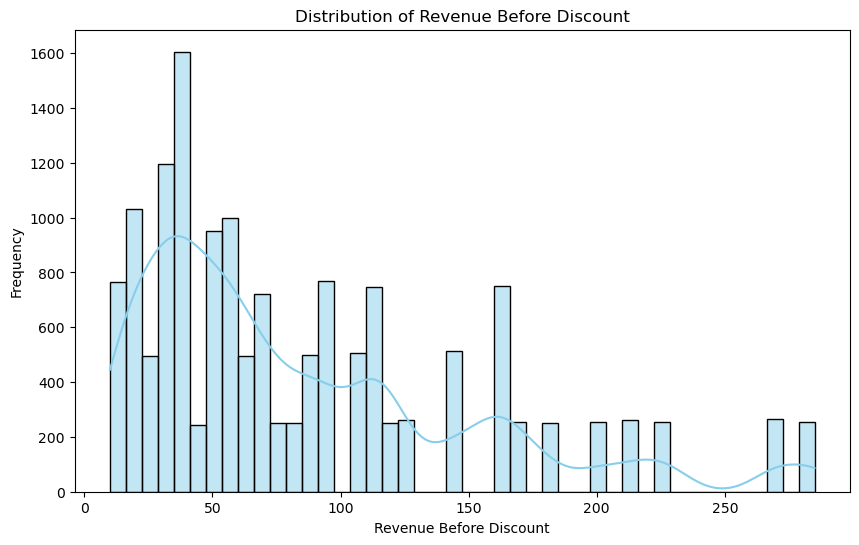

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(merge1['revenue_before_discount'], kde=True, color='skyblue')
plt.title('Distribution of Revenue Before Discount')
plt.xlabel('Revenue Before Discount')
plt.ylabel('Frequency')
plt.show()

### 3. What was the total discount amount for all products?

In [29]:
discount_amount = merge1.groupby('product_name')['discount'].sum()

In [30]:
discount_amount

product_name
Black Straight Jeans - Womens       15257
Blue Polo Shirt - Mens              15553
Cream Relaxed Jeans - Womens        15065
Grey Fashion Jacket - Womens        15500
Indigo Rain Jacket - Womens         15283
Khaki Suit Jacket - Womens          14669
Navy Oversized Jeans - Womens       15418
Navy Solid Socks - Mens             15646
Pink Fluro Polkadot Socks - Mens    14946
Teal Button Up Shirt - Mens         15003
White Striped Socks - Mens          14873
White Tee Shirt - Mens              15487
Name: discount, dtype: int64

In [31]:
total_discount_amount = merge1['discount'].sum()

In [32]:
print(f"Total discount amount for all products : {total_discount_amount}")

Total discount amount for all products : 182700


#### with visualization :

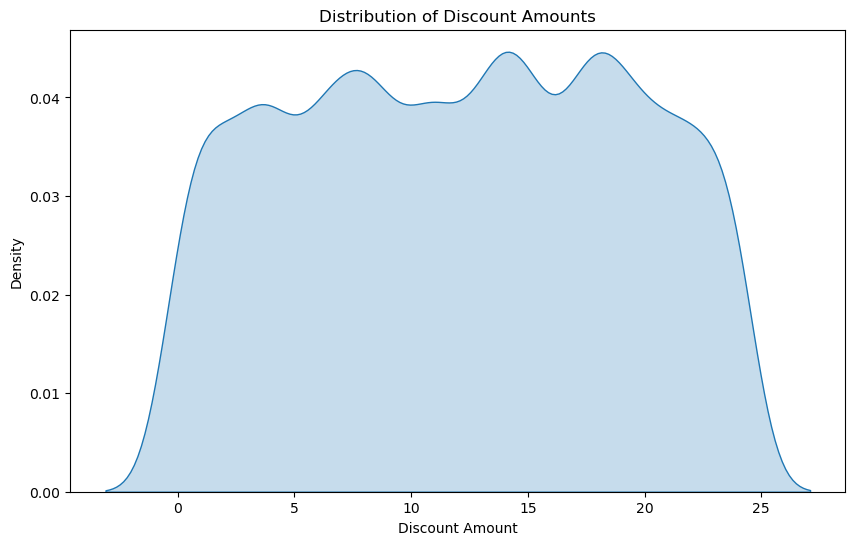

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(merge1['discount'], fill=True)
plt.title('Distribution of Discount Amounts')
plt.xlabel('Discount Amount')
plt.ylabel('Density')
plt.show()

# Transaction Analysis :

### 1. How many unique transactions were there?

In [34]:
merge1

,prod_id,qty,price_x,discount,member,txn_id,start_txn_time,product_id,price_y,product_name,category_id,segment_id,style_id,category_name,segment_name,style_name,quantity_sold,revenue_before_discount
0,c4a632,4,13,17,t,54f307,2021-02-13 01:59:43.296000,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,35,52
1,c4a632,5,13,21,t,26cc98,2021-01-19 01:39:00.345600,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,44,65
2,c4a632,1,13,21,f,ef648d,2021-01-27 02:18:17.164800,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,-8,13
3,c4a632,2,13,23,t,fba96f,2021-03-03 00:32:56.054400,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,3,26
4,c4a632,5,13,11,t,4e9268,2021-01-23 14:18:54.057600,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,54,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15090,c8d436,1,10,20,t,359542,2021-03-02 07:12:38.880000,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,-10,10
15091,c8d436,2,10,13,f,f905a2,2021-03-07 19:15:40.233600,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,7,20
15092,c8d436,1,10,6,t,ba59c1,2021-02-08 12:26:55.507200,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,4,10
15093,c8d436,3,10,12,f,15cfae,2021-02-09 22:01:44.659200,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,18,30


In [35]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15095 entries, 0 to 15094
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   prod_id                  15095 non-null  object        
 1   qty                      15095 non-null  int64         
 2   price_x                  15095 non-null  int64         
 3   discount                 15095 non-null  int64         
 4   member                   15095 non-null  object        
 5   txn_id                   15095 non-null  object        
 6   start_txn_time           15085 non-null  datetime64[ns]
 7   product_id               15095 non-null  object        
 8   price_y                  15095 non-null  int64         
 9   product_name             15095 non-null  object        
 10  category_id              15095 non-null  int64         
 11  segment_id               15095 non-null  int64         
 12  style_id                 15095 n

In [36]:
unique = merge1['txn_id'].nunique()

In [37]:
unique

2500

#### with visualisation :

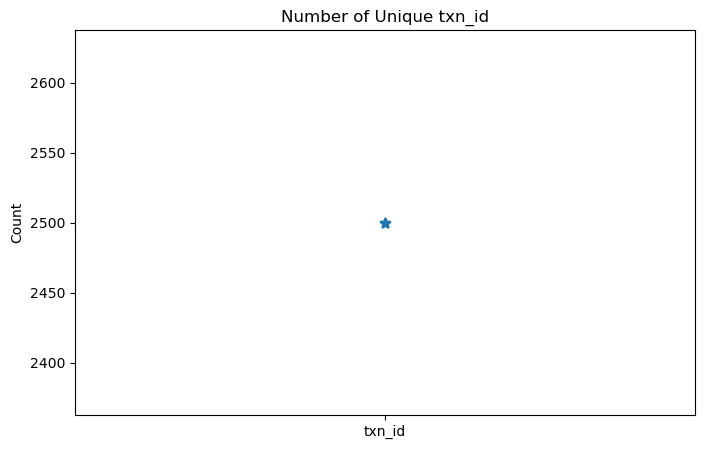

In [38]:
plt.figure(figsize=(8, 5))
sns.pointplot(x=['txn_id'], y=[merge1['txn_id'].nunique()], markers = ['*'])
plt.title('Number of Unique txn_id')
plt.ylabel('Count')
plt.show()

### 2. What is the average unique products purchased in each transaction?

In [39]:
unique_products = product_sales.groupby('txn_id')['prod_id'].nunique()

In [40]:
unique_products

txn_id
000027    7
000106    6
000dd8    6
003920    6
003c6d    7
         ..
ff753a    6
ff7974    5
ffac3f    6
fff8ca    6
fffa11    4
Name: prod_id, Length: 2500, dtype: int64

In [41]:
avg_unique_products = unique_products.mean()

In [42]:
print(f"average unique products purchased in each transaction : {avg_unique_products}")

average unique products purchased in each transaction : 6.038


#### with visualization :

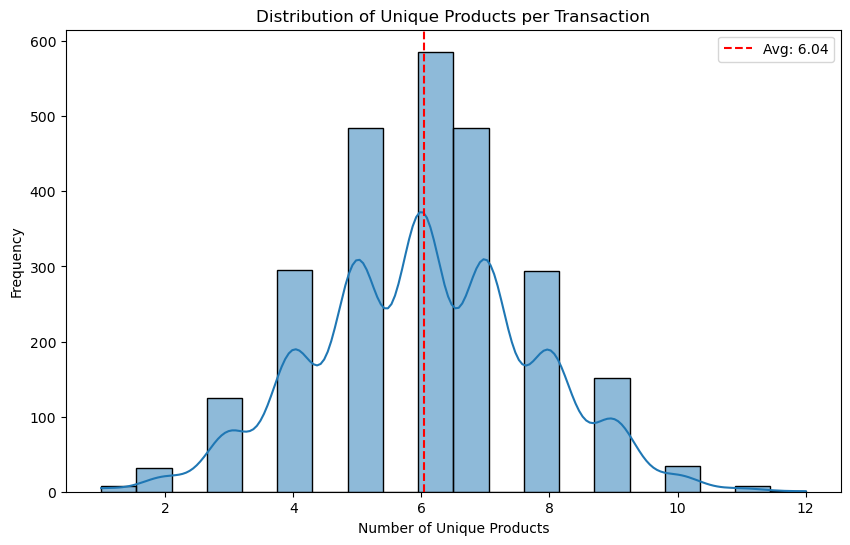

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(unique_products, bins=20, kde=True)
plt.axvline(avg_unique_products, color='red', linestyle='--', label=f'Avg: {avg_unique_products:.2f}')
plt.title('Distribution of Unique Products per Transaction')
plt.xlabel('Number of Unique Products')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 3. What are the 25th, 50th and 75th percentile values for the revenue per transaction?


In [44]:
total_revenue_trans = merge1.groupby('txn_id')['revenue_before_discount'].sum()

In [45]:
total_revenue_trans

txn_id
000027    521
000106    452
000dd8    392
003920    607
003c6d    472
         ... 
ff753a    768
ff7974    422
ffac3f    654
fff8ca    644
fffa11    421
Name: revenue_before_discount, Length: 2500, dtype: int64

In [46]:
percentiles = total_revenue_trans.quantile([0.25,0.50,0.75])

In [47]:
print("25th percentiles value for total revenue per transaction:", percentiles[0.25])
print("50th percentiles value for total revenue per transaction:", percentiles[0.5])
print("75th percentiles value for total revenue per transaction:", percentiles[0.75])

25th percentiles value for total revenue per transaction: 375.75
50th percentiles value for total revenue per transaction: 509.5
75th percentiles value for total revenue per transaction: 647.0


#### with visualization :

NameError: name 'percentile' is not defined

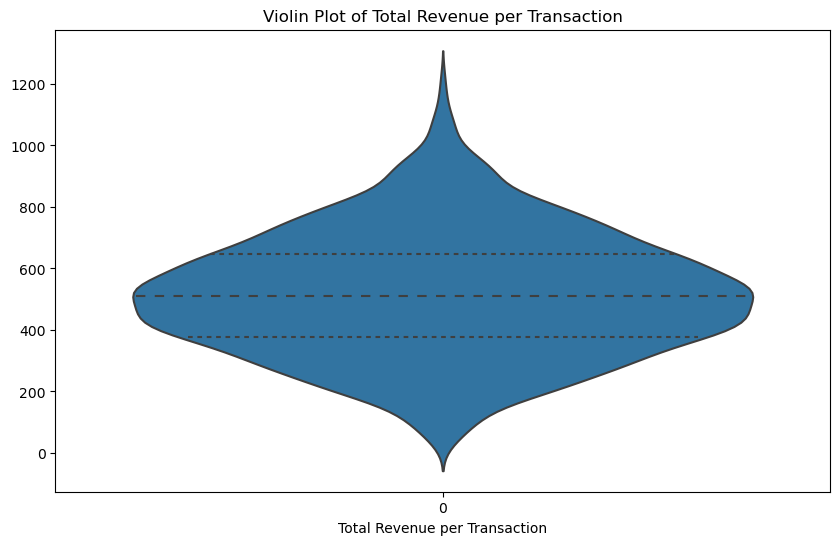

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(total_revenue_trans, inner="quartile", linewidth=1.5)
plt.title('Violin Plot of Total Revenue per Transaction')
plt.xlabel('Total Revenue per Transaction')
for i, percentiles in enumerate(percentile):
    plt.axvline(percentile, linestyle='--', color='r', label=f'{i+1}st Quartile ({percentile:.2f})')
plt.legend()
plt.show()

### 4. What is the average discount value per transaction?


In [49]:
discount_trans = merge1.groupby('txn_id')['discount'].sum()

In [50]:
discount_trans

txn_id
000027     91
000106     72
000dd8     36
003920    108
003c6d     91
         ... 
ff753a     54
ff7974      0
ffac3f    144
fff8ca     18
fffa11     56
Name: discount, Length: 2500, dtype: int64

In [51]:
avg_discount_trans = discount_trans.mean()

In [52]:
print(f"average discount value per transaction : {avg_discount_trans}")

average discount value per transaction : 73.08


#### with visualization :

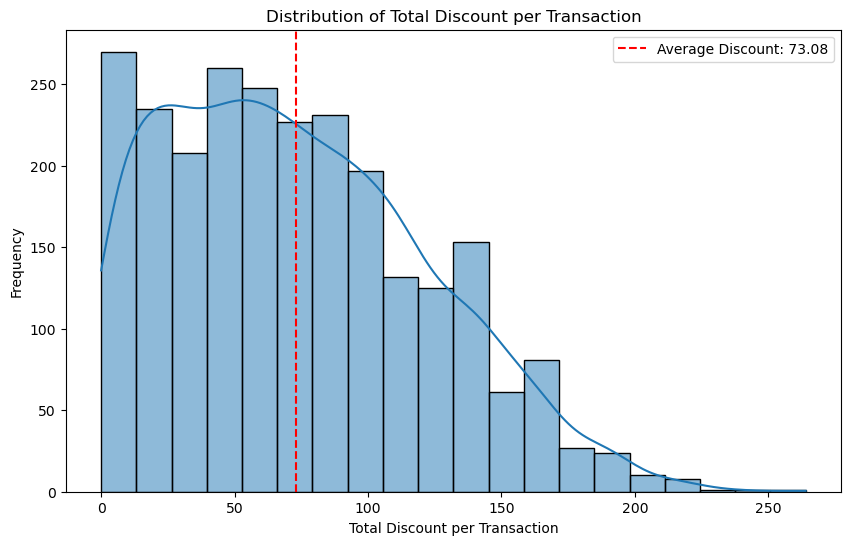

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(discount_trans, bins=20, kde=True)
plt.axvline(avg_discount_trans, color='red', linestyle='--', label=f'Average Discount: {avg_discount_trans:.2f}')
plt.title('Distribution of Total Discount per Transaction')
plt.xlabel('Total Discount per Transaction')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 5. What is the percentage split of all transactions for members vs non-members?


In [54]:
member_trans = len(merge1[merge1['member'] == 't']) 
non_member_trans = len(merge1[merge1['member'] == 'f'])

In [55]:
member_trans

9061

In [56]:
non_member_trans

6034

In [57]:
total = member_trans + non_member_trans

In [58]:
total

15095

In [59]:
member_percentage = member_trans / total * 100
non_member_percentage = non_member_trans / total * 100

In [60]:
print(f"percentage split of all transactions for members : {member_percentage}")
print(f"percentage split of all transactions for non members : {non_member_percentage}")

percentage split of all transactions for members : 60.02649884067572
percentage split of all transactions for non members : 39.97350115932428


#### with visualization :

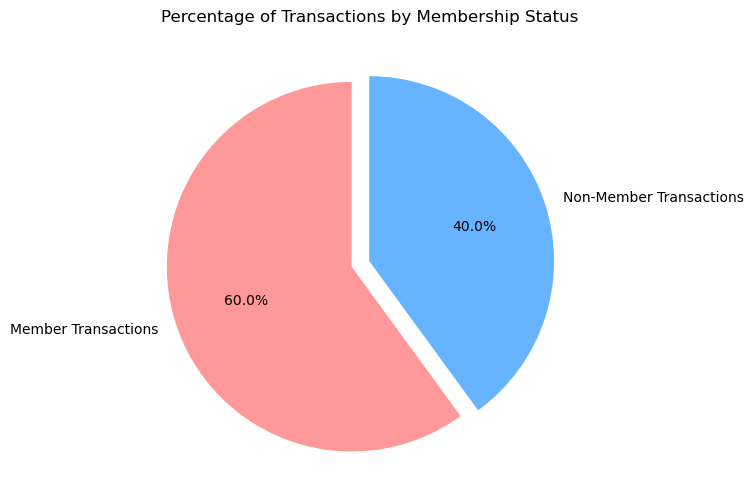

In [61]:
labels = ['Member Transactions', 'Non-Member Transactions']
sizes = [member_percentage, non_member_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0) 
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Transactions by Membership Status')
plt.show()

### 6. What is the average revenue for member transactions and non-member transactions?


In [62]:
avg_revenue_member = merge1[merge1['member'] == 't']['revenue_before_discount'].mean()

In [63]:
avg_revenue_member

85.75035868005739

In [64]:
avg_revenue_non_member = merge1[merge1['member'] == 'f']['revenue_before_discount'].mean()

In [65]:
avg_revenue_non_member

84.9302287040106

In [66]:
print("Average revenue for member transactions:", avg_revenue_member)
print("Average revenue for non-member transactions:", avg_revenue_non_member)

Average revenue for member transactions: 85.75035868005739
Average revenue for non-member transactions: 84.9302287040106


#### with visualization : 

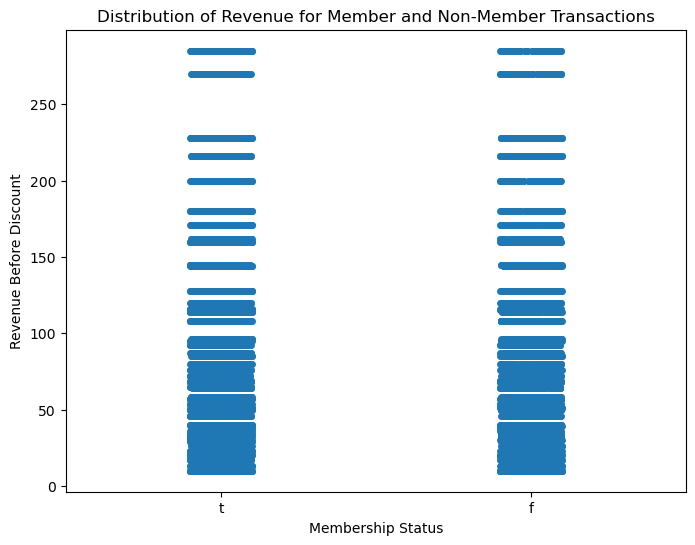

In [67]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='member', y='revenue_before_discount', data=merge1, jitter=True)
plt.xlabel('Membership Status')
plt.ylabel('Revenue Before Discount')
plt.title('Distribution of Revenue for Member and Non-Member Transactions')
plt.show()

# Product Analysis :


### 1. What are the top 3 products by total revenue before discount?


In [68]:
merge1

,prod_id,qty,price_x,discount,member,txn_id,start_txn_time,product_id,price_y,product_name,category_id,segment_id,style_id,category_name,segment_name,style_name,quantity_sold,revenue_before_discount
0,c4a632,4,13,17,t,54f307,2021-02-13 01:59:43.296000,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,35,52
1,c4a632,5,13,21,t,26cc98,2021-01-19 01:39:00.345600,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,44,65
2,c4a632,1,13,21,f,ef648d,2021-01-27 02:18:17.164800,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,-8,13
3,c4a632,2,13,23,t,fba96f,2021-03-03 00:32:56.054400,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,3,26
4,c4a632,5,13,11,t,4e9268,2021-01-23 14:18:54.057600,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,54,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15090,c8d436,1,10,20,t,359542,2021-03-02 07:12:38.880000,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,-10,10
15091,c8d436,2,10,13,f,f905a2,2021-03-07 19:15:40.233600,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,7,20
15092,c8d436,1,10,6,t,ba59c1,2021-02-08 12:26:55.507200,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,4,10
15093,c8d436,3,10,12,f,15cfae,2021-02-09 22:01:44.659200,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,18,30


In [69]:
product_revenue = merge1.groupby(['product_id', 'product_name'])['revenue_before_discount'].sum()

In [70]:
product_revenue

product_id  product_name                    
2a2353      Blue Polo Shirt - Mens              217683
2feb6b      Pink Fluro Polkadot Socks - Mens    109330
5d267b      White Tee Shirt - Mens              152000
72f5d4      Indigo Rain Jacket - Womens          71383
9ec847      Grey Fashion Jacket - Womens        209304
b9a74d      White Striped Socks - Mens           62135
c4a632      Navy Oversized Jeans - Womens        50128
c8d436      Teal Button Up Shirt - Mens          36460
d5e9a6      Khaki Suit Jacket - Womens           86296
e31d39      Cream Relaxed Jeans - Womens         37070
e83aa3      Black Straight Jeans - Womens       121152
f084eb      Navy Solid Socks - Mens             136512
Name: revenue_before_discount, dtype: int64

In [71]:
top_products = product_revenue.nlargest(3)

In [72]:
print(f" the top 3 products by total revenue before discount : {top_products}")

 the top 3 products by total revenue before discount : product_id  product_name                
2a2353      Blue Polo Shirt - Mens          217683
9ec847      Grey Fashion Jacket - Womens    209304
5d267b      White Tee Shirt - Mens          152000
Name: revenue_before_discount, dtype: int64


#### with visualization:

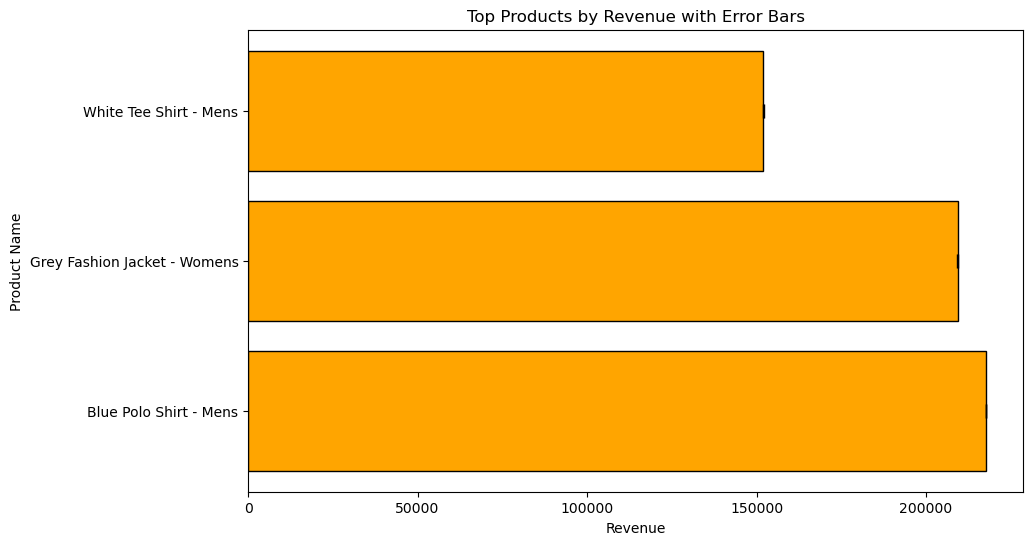

In [73]:
std_revenue = merge1.groupby(['product_id', 'product_name'])['revenue_before_discount'].std().loc[top_products.index]
plt.figure(figsize=(10, 6))
plt.barh(y=top_products.index.get_level_values('product_name'), width=top_products.values,
         xerr=std_revenue, capsize=5, color='orange', edgecolor='black')
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.title('Top Products by Revenue with Error Bars')
plt.show()

### 2. What is the total quantity, revenue and discount for each segment?


In [74]:
merge1['segment_id'].unique()

array([3, 5, 6, 4], dtype=int64)

In [75]:
merge1['segment_name'].unique()

array(['Jeans', 'Shirt', 'Socks', 'Jacket'], dtype=object)

In [76]:
segment_total_name = merge1.groupby(['segment_name', 'segment_id']).agg({
    'qty' : 'sum',
    'revenue_before_discount': 'sum',
    'discount': 'sum'}).reset_index()

In [77]:
print(f"The  total quantity, revenue and discount for each segment :\n {segment_total_name}")

The  total quantity, revenue and discount for each segment :
   segment_name  segment_id    qty  revenue_before_discount  discount
0       Jacket           4  11385                   366983     45452
1        Jeans           3  11349                   208350     45740
2        Shirt           5  11265                   406143     46043
3        Socks           6  11217                   307977     45465


#### with visualization :

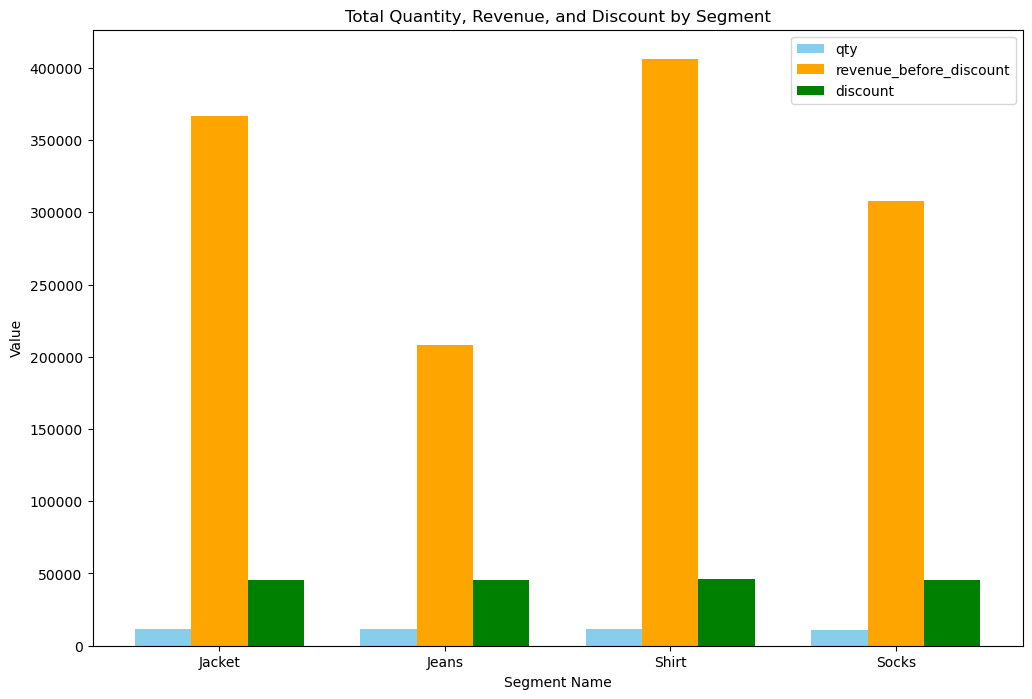

In [78]:
segments = segment_total_name['segment_name'].unique()
metrics = ['qty', 'revenue_before_discount', 'discount']
colors = ['skyblue', 'orange', 'green']
plt.figure(figsize=(12, 8))
bar_width = 0.25
for i, metric in enumerate(metrics):
    x = np.arange(len(segments)) + i * bar_width
    plt.bar(x, segment_total_name[metric], width=bar_width, color=colors[i], label=metric)
plt.xlabel('Segment Name')
plt.ylabel('Value')
plt.title('Total Quantity, Revenue, and Discount by Segment')
plt.xticks(np.arange(len(segments)) + bar_width, segments)
plt.legend()
plt.show()

### 3. What is the top selling product for each segment?

In [79]:
product_segment = merge1.groupby(['segment_id', 'segment_name','product_id','product_name'])['qty'].sum().reset_index()

In [80]:
product_segment

,segment_id,segment_name,product_id,product_name,qty
0,3,Jeans,c4a632,Navy Oversized Jeans - Womens,3856
1,3,Jeans,e31d39,Cream Relaxed Jeans - Womens,3707
2,3,Jeans,e83aa3,Black Straight Jeans - Womens,3786
3,4,Jacket,72f5d4,Indigo Rain Jacket - Womens,3757
4,4,Jacket,9ec847,Grey Fashion Jacket - Womens,3876
5,4,Jacket,d5e9a6,Khaki Suit Jacket - Womens,3752
6,5,Shirt,2a2353,Blue Polo Shirt - Mens,3819
7,5,Shirt,5d267b,White Tee Shirt - Mens,3800
8,5,Shirt,c8d436,Teal Button Up Shirt - Mens,3646
9,6,Socks,2feb6b,Pink Fluro Polkadot Socks - Mens,3770


In [81]:
top_sales_index = product_segment.groupby(['segment_id',
                                           'segment_name','product_name'])['qty'].idxmax()

In [82]:
top_sales_index

segment_id  segment_name  product_name                    
3           Jeans         Black Straight Jeans - Womens        2
                          Cream Relaxed Jeans - Womens         1
                          Navy Oversized Jeans - Womens        0
4           Jacket        Grey Fashion Jacket - Womens         4
                          Indigo Rain Jacket - Womens          3
                          Khaki Suit Jacket - Womens           5
5           Shirt         Blue Polo Shirt - Mens               6
                          Teal Button Up Shirt - Mens          8
                          White Tee Shirt - Mens               7
6           Socks         Navy Solid Socks - Mens             11
                          Pink Fluro Polkadot Socks - Mens     9
                          White Striped Socks - Mens          10
Name: qty, dtype: int64

In [83]:
top_sales = product_segment.loc[top_sales_index]

In [84]:
top_sales.sort_values(by=['segment_id'], inplace=True)

In [85]:
print(f"The top selling product for each segment :\n {top_sales}")

The top selling product for each segment :
     segment_id segment_name product_id                      product_name   qty
2            3        Jeans     e83aa3     Black Straight Jeans - Womens  3786
1            3        Jeans     e31d39      Cream Relaxed Jeans - Womens  3707
0            3        Jeans     c4a632     Navy Oversized Jeans - Womens  3856
4            4       Jacket     9ec847      Grey Fashion Jacket - Womens  3876
3            4       Jacket     72f5d4       Indigo Rain Jacket - Womens  3757
5            4       Jacket     d5e9a6        Khaki Suit Jacket - Womens  3752
6            5        Shirt     2a2353            Blue Polo Shirt - Mens  3819
8            5        Shirt     c8d436       Teal Button Up Shirt - Mens  3646
7            5        Shirt     5d267b            White Tee Shirt - Mens  3800
11           6        Socks     f084eb           Navy Solid Socks - Mens  3792
9            6        Socks     2feb6b  Pink Fluro Polkadot Socks - Mens  3770
10      

#### with visualization :

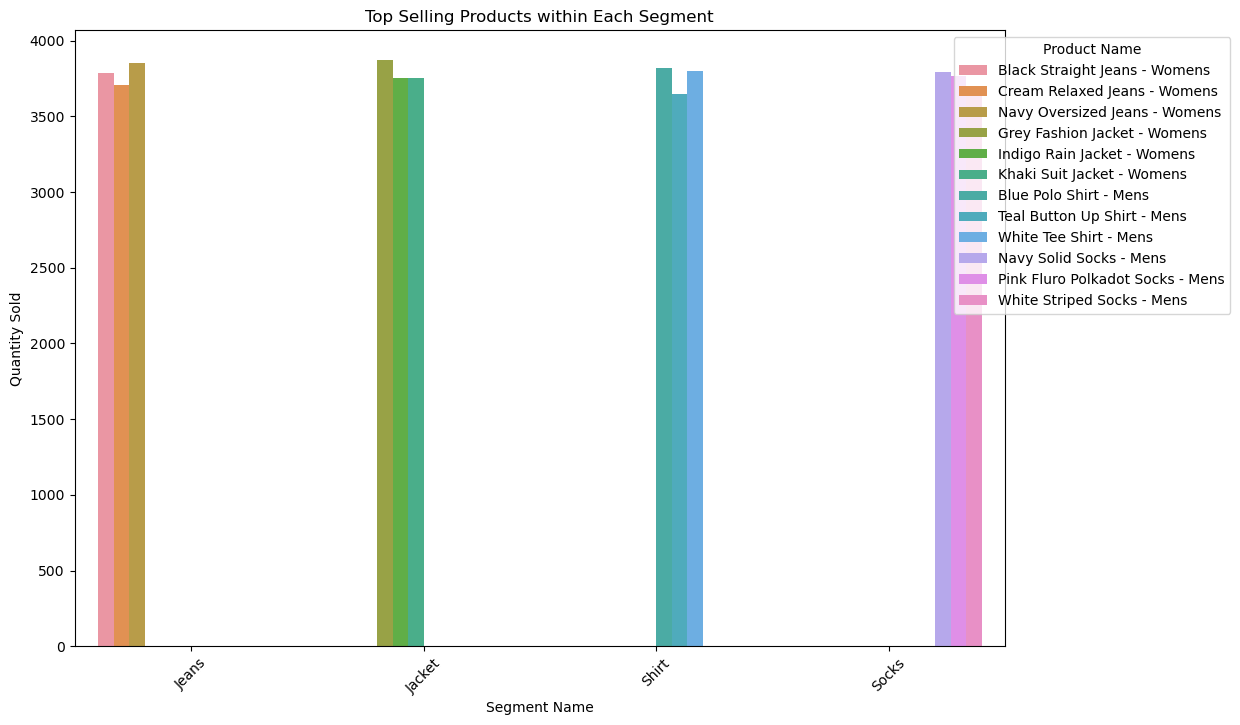

In [86]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_sales, x='segment_name', y='qty', hue='product_name')
plt.xlabel('Segment Name')
plt.ylabel('Quantity Sold')
plt.title('Top Selling Products within Each Segment')
plt.legend(title='Product Name', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=45)
plt.show()

### 4. What is the total quantity, revenue and discount for each category?


In [87]:
merge1['category_id'].unique()

array([1, 2], dtype=int64)

In [88]:
merge1['category_name'].unique()

array(['Womens', 'Mens'], dtype=object)

In [89]:
category_total_name = merge1.groupby(['category_name', 'category_id']).agg({
    'qty' : 'sum',
    'revenue_before_discount': 'sum',
    'discount': 'sum'}).reset_index()

In [90]:
print(f"The otal quantity, revenue and discount for each category:\n {category_total_name}")

The otal quantity, revenue and discount for each category:
   category_name  category_id    qty  revenue_before_discount  discount
0          Mens            2  22482                   714120     91508
1        Womens            1  22734                   575333     91192


#### with visualization :

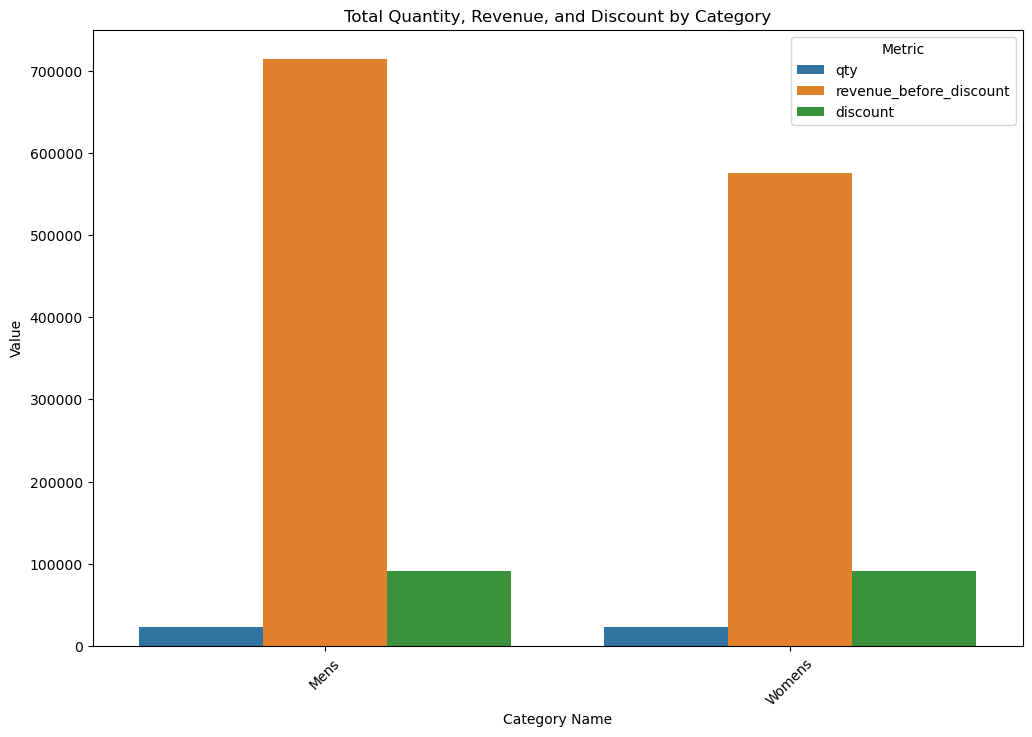

In [91]:
category_total_name_melted = category_total_name.melt(id_vars=['category_name', 'category_id'], var_name='metric', 
                                                      value_name='value')
plt.figure(figsize=(12, 8))
sns.barplot(data=category_total_name_melted, x='category_name', y='value', hue='metric')
plt.xlabel('Category Name')
plt.ylabel('Value')
plt.title('Total Quantity, Revenue, and Discount by Category')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

### 5. What is the top selling product for each category?


In [92]:
category_product = merge1.groupby(['category_id', 
            'category_name','product_id','product_name'])['qty'].sum().reset_index()

In [93]:
category_product

,category_id,category_name,product_id,product_name,qty
0,1,Womens,72f5d4,Indigo Rain Jacket - Womens,3757
1,1,Womens,9ec847,Grey Fashion Jacket - Womens,3876
2,1,Womens,c4a632,Navy Oversized Jeans - Womens,3856
3,1,Womens,d5e9a6,Khaki Suit Jacket - Womens,3752
4,1,Womens,e31d39,Cream Relaxed Jeans - Womens,3707
5,1,Womens,e83aa3,Black Straight Jeans - Womens,3786
6,2,Mens,2a2353,Blue Polo Shirt - Mens,3819
7,2,Mens,2feb6b,Pink Fluro Polkadot Socks - Mens,3770
8,2,Mens,5d267b,White Tee Shirt - Mens,3800
9,2,Mens,b9a74d,White Striped Socks - Mens,3655


In [94]:
top_category_index = category_product.groupby(['category_id', 'category_name'])['qty'].idxmax()

In [95]:
top_category_index

category_id  category_name
1            Womens           1
2            Mens             6
Name: qty, dtype: int64

In [96]:
top_category = category_product.loc[top_category_index]

In [97]:
print(f"The top selling product for each category :\n {top_category}")

The top selling product for each category :
    category_id category_name product_id                  product_name   qty
1            1        Womens     9ec847  Grey Fashion Jacket - Womens  3876
6            2          Mens     2a2353        Blue Polo Shirt - Mens  3819


#### with visualization :

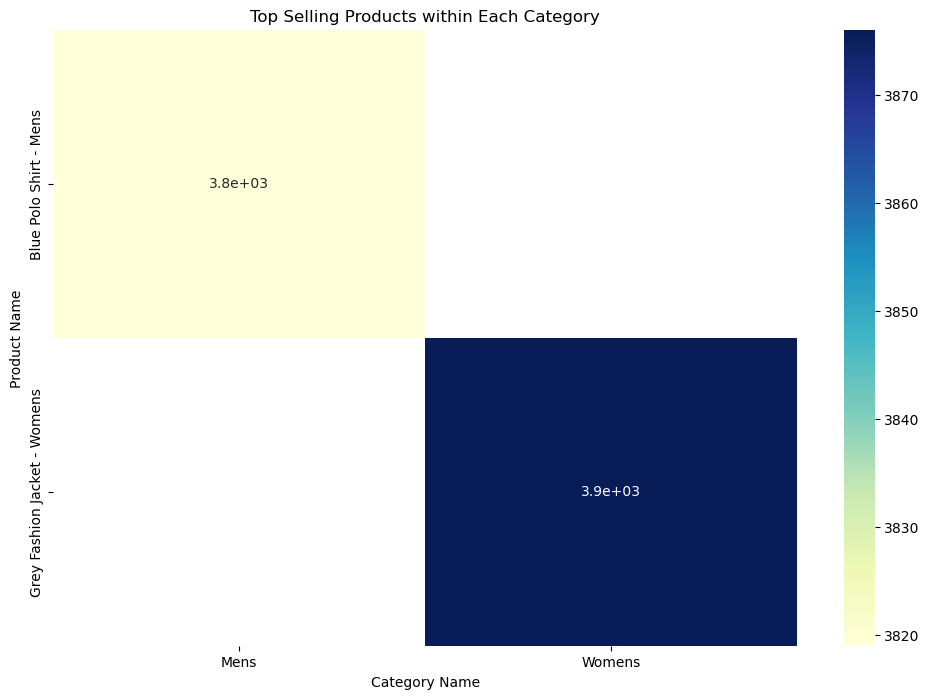

In [98]:
top_category_pivot = top_category.pivot(index='product_name', 
                                        columns='category_name', values='qty')
plt.figure(figsize=(12, 8))
sns.heatmap(top_category_pivot, cmap='YlGnBu', annot=True)
plt.xlabel('Category Name')
plt.ylabel('Product Name')
plt.title('Top Selling Products within Each Category')
plt.show()

### 6. What is the percentage split of revenue by product for each segment?

In [99]:
merge1

,prod_id,qty,price_x,discount,member,txn_id,start_txn_time,product_id,price_y,product_name,category_id,segment_id,style_id,category_name,segment_name,style_name,quantity_sold,revenue_before_discount
0,c4a632,4,13,17,t,54f307,2021-02-13 01:59:43.296000,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,35,52
1,c4a632,5,13,21,t,26cc98,2021-01-19 01:39:00.345600,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,44,65
2,c4a632,1,13,21,f,ef648d,2021-01-27 02:18:17.164800,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,-8,13
3,c4a632,2,13,23,t,fba96f,2021-03-03 00:32:56.054400,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,3,26
4,c4a632,5,13,11,t,4e9268,2021-01-23 14:18:54.057600,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized,54,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15090,c8d436,1,10,20,t,359542,2021-03-02 07:12:38.880000,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,-10,10
15091,c8d436,2,10,13,f,f905a2,2021-03-07 19:15:40.233600,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,7,20
15092,c8d436,1,10,6,t,ba59c1,2021-02-08 12:26:55.507200,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,4,10
15093,c8d436,3,10,12,f,15cfae,2021-02-09 22:01:44.659200,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up,18,30


In [100]:
segment_product = merge1.groupby(['segment_id',
                    'segment_name', 'product_id','product_name'])['revenue_before_discount'].sum()

In [101]:
segment_product

segment_id  segment_name  product_id  product_name                    
3           Jeans         c4a632      Navy Oversized Jeans - Womens        50128
                          e31d39      Cream Relaxed Jeans - Womens         37070
                          e83aa3      Black Straight Jeans - Womens       121152
4           Jacket        72f5d4      Indigo Rain Jacket - Womens          71383
                          9ec847      Grey Fashion Jacket - Womens        209304
                          d5e9a6      Khaki Suit Jacket - Womens           86296
5           Shirt         2a2353      Blue Polo Shirt - Mens              217683
                          5d267b      White Tee Shirt - Mens              152000
                          c8d436      Teal Button Up Shirt - Mens          36460
6           Socks         2feb6b      Pink Fluro Polkadot Socks - Mens    109330
                          b9a74d      White Striped Socks - Mens           62135
                          f084eb      

In [102]:
total_segment_product = merge1.groupby(['segment_id', 
                                        'segment_name'])['revenue_before_discount'].sum()

In [103]:
total_segment_product

segment_id  segment_name
3           Jeans           208350
4           Jacket          366983
5           Shirt           406143
6           Socks           307977
Name: revenue_before_discount, dtype: int64

In [104]:
split = segment_product / total_segment_product * 100

In [105]:
print(f"The percentage split of revenue by product for each segment : \n {split}")

The percentage split of revenue by product for each segment : 
 segment_id  segment_name  product_id  product_name                    
3           Jeans         c4a632      Navy Oversized Jeans - Womens       24.059515
                          e31d39      Cream Relaxed Jeans - Womens        17.792177
                          e83aa3      Black Straight Jeans - Womens       58.148308
4           Jacket        72f5d4      Indigo Rain Jacket - Womens         19.451310
                          9ec847      Grey Fashion Jacket - Womens        57.033705
                          d5e9a6      Khaki Suit Jacket - Womens          23.514986
5           Shirt         2a2353      Blue Polo Shirt - Mens              53.597624
                          5d267b      White Tee Shirt - Mens              37.425242
                          c8d436      Teal Button Up Shirt - Mens          8.977134
6           Socks         2feb6b      Pink Fluro Polkadot Socks - Mens    35.499404
                         

#### with visualization :

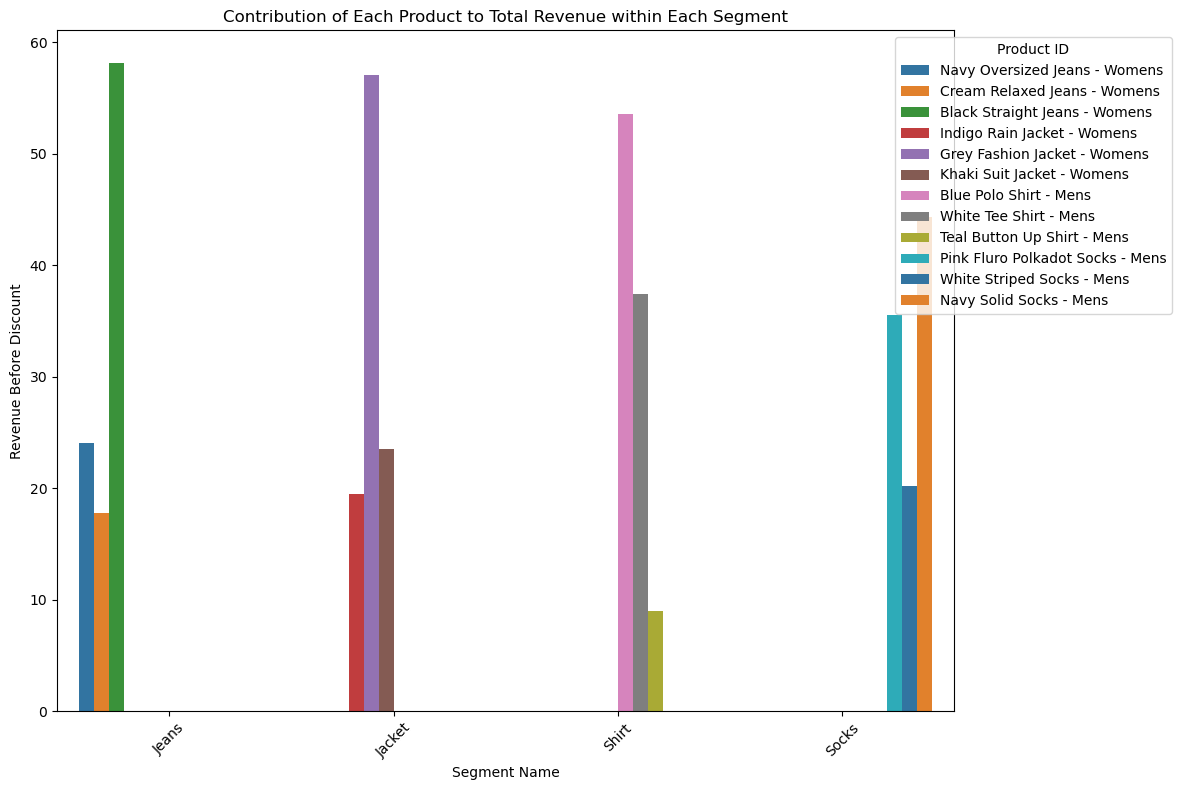

In [106]:
split_df = split.reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=split_df, x='segment_name', y='revenue_before_discount', 
            hue='product_name', palette='tab10')
plt.xlabel('Segment Name')
plt.ylabel('Revenue Before Discount')
plt.title('Contribution of Each Product to Total Revenue within Each Segment')
plt.legend(title='Product ID', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7. What is the percentage split of revenue by segment for each category?


In [107]:
segment_cateogry = merge1.groupby(['category_id',
                'category_name', 'product_id','product_name'])['revenue_before_discount'].sum()

In [108]:
segment_cateogry

category_id  category_name  product_id  product_name                    
1            Womens         72f5d4      Indigo Rain Jacket - Womens          71383
                            9ec847      Grey Fashion Jacket - Womens        209304
                            c4a632      Navy Oversized Jeans - Womens        50128
                            d5e9a6      Khaki Suit Jacket - Womens           86296
                            e31d39      Cream Relaxed Jeans - Womens         37070
                            e83aa3      Black Straight Jeans - Womens       121152
2            Mens           2a2353      Blue Polo Shirt - Mens              217683
                            2feb6b      Pink Fluro Polkadot Socks - Mens    109330
                            5d267b      White Tee Shirt - Mens              152000
                            b9a74d      White Striped Socks - Mens           62135
                            c8d436      Teal Button Up Shirt - Mens          36460
              

In [109]:
total_segment_category = merge1.groupby(['category_id', 
                                        'category_name'])['revenue_before_discount'].sum()

In [110]:
total_segment_category

category_id  category_name
1            Womens           575333
2            Mens             714120
Name: revenue_before_discount, dtype: int64

In [111]:
split = segment_cateogry / total_segment_category * 100

In [112]:
print(f"The percentage split of revenue by product for each category : \n {split}")

The percentage split of revenue by product for each category : 
 category_id  category_name  product_id  product_name                    
1            Womens         72f5d4      Indigo Rain Jacket - Womens         12.407249
                            9ec847      Grey Fashion Jacket - Womens        36.379627
                            c4a632      Navy Oversized Jeans - Womens        8.712867
                            d5e9a6      Khaki Suit Jacket - Womens          14.999313
                            e31d39      Cream Relaxed Jeans - Womens         6.443225
                            e83aa3      Black Straight Jeans - Womens       21.057718
2            Mens           2a2353      Blue Polo Shirt - Mens              30.482692
                            2feb6b      Pink Fluro Polkadot Socks - Mens    15.309752
                            5d267b      White Tee Shirt - Mens              21.284938
                            b9a74d      White Striped Socks - Mens           8.700919
  

#### with visualization :

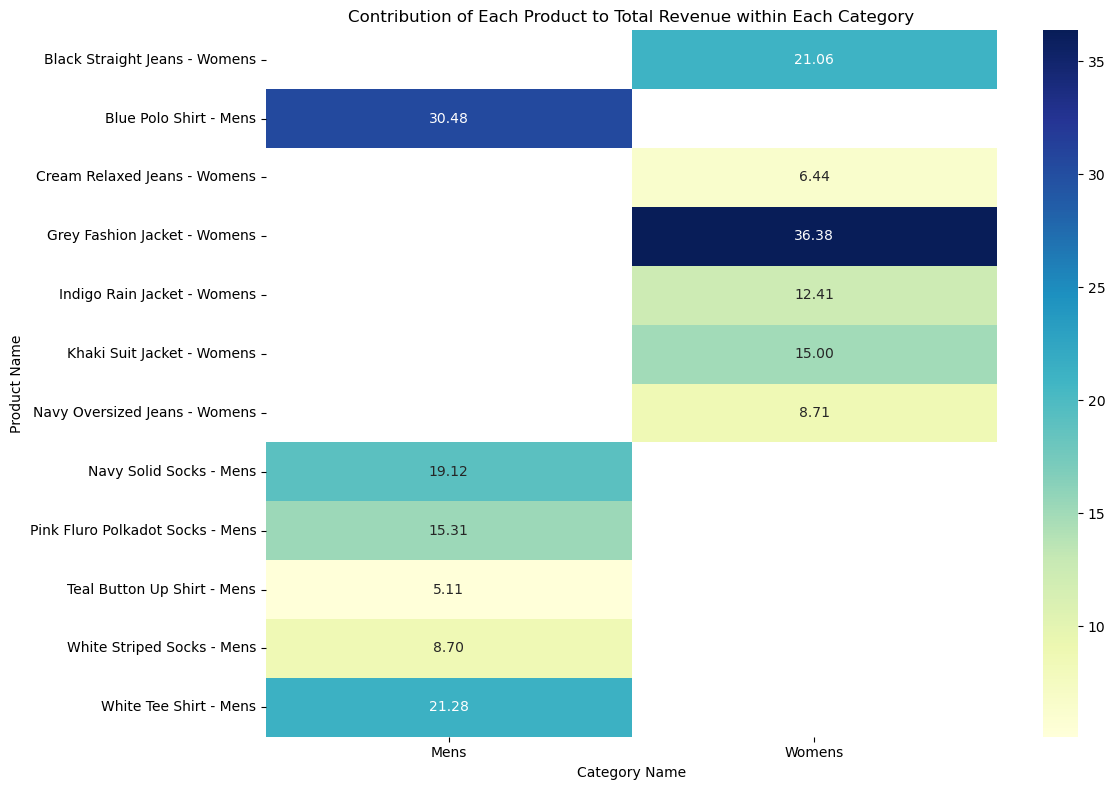

In [113]:
split_df = split.reset_index()
split_pivot = split_df.pivot(index='product_name', columns='category_name', 
                             values='revenue_before_discount')
plt.figure(figsize=(12, 8))
sns.heatmap(split_pivot, cmap='YlGnBu', annot=True, fmt='.2f')
plt.xlabel('Category Name')
plt.ylabel('Product Name')
plt.title('Contribution of Each Product to Total Revenue within Each Category')
plt.tight_layout()
plt.show()

### 8. What is the percentage split of total revenue by category?


In [114]:
category_revenue = merge1.groupby(['category_id', 
                                   'category_name'])['revenue_before_discount'].sum()

In [115]:
category_revenue

category_id  category_name
1            Womens           575333
2            Mens             714120
Name: revenue_before_discount, dtype: int64

In [116]:
all_category_revenue = category_revenue.sum()

In [117]:
all_category_revenue

1289453

In [118]:
percentage = category_revenue / all_category_revenue * 100

In [119]:
print(f"The percentage split of total revenue by category : \n {percentage}")

The percentage split of total revenue by category : 
 category_id  category_name
1            Womens           44.618377
2            Mens             55.381623
Name: revenue_before_discount, dtype: float64


#### with visualization :

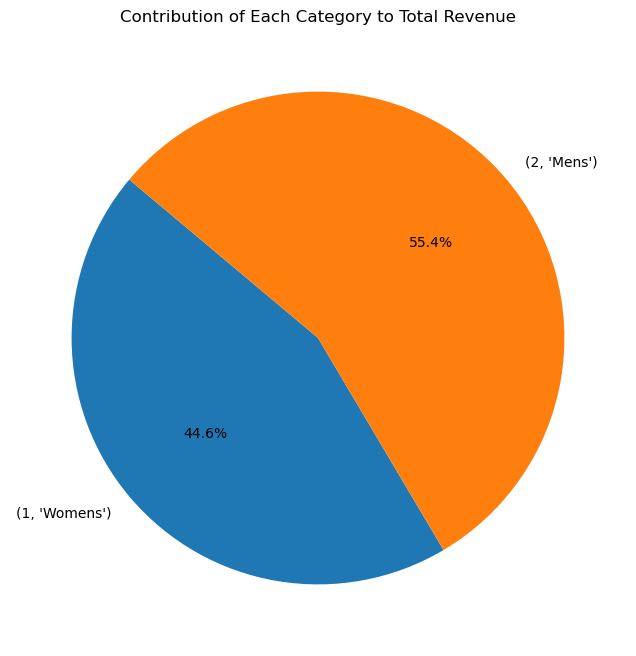

In [120]:
plt.figure(figsize=(10, 8))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Contribution of Each Category to Total Revenue')
plt.show()

### 9. What is the total transaction “penetration” for each product? (hint: penetration = number of transactions where at least one quantity of a product was purchased divided by total number of transactions)


In [121]:
product_penetration = merge1.groupby(['product_id',
                                'product_name'])['txn_id'].nunique().reset_index(name = 'penetration')

In [122]:
product_penetration

,product_id,product_name,penetration
0,2a2353,Blue Polo Shirt - Mens,1268
1,2feb6b,Pink Fluro Polkadot Socks - Mens,1258
2,5d267b,White Tee Shirt - Mens,1268
3,72f5d4,Indigo Rain Jacket - Womens,1250
4,9ec847,Grey Fashion Jacket - Womens,1275
5,b9a74d,White Striped Socks - Mens,1243
6,c4a632,Navy Oversized Jeans - Womens,1274
7,c8d436,Teal Button Up Shirt - Mens,1242
8,d5e9a6,Khaki Suit Jacket - Womens,1247
9,e31d39,Cream Relaxed Jeans - Womens,1243


In [123]:
total_trans = merge1['txn_id'].nunique()

In [124]:
total_trans

2500

In [125]:
product_penetration['product_penetration'] = product_penetration['penetration'] / total_trans

In [126]:
product_penetration

,product_id,product_name,penetration,product_penetration
0,2a2353,Blue Polo Shirt - Mens,1268,0.5072
1,2feb6b,Pink Fluro Polkadot Socks - Mens,1258,0.5032
2,5d267b,White Tee Shirt - Mens,1268,0.5072
3,72f5d4,Indigo Rain Jacket - Womens,1250,0.5000
4,9ec847,Grey Fashion Jacket - Womens,1275,0.5100
5,b9a74d,White Striped Socks - Mens,1243,0.4972
6,c4a632,Navy Oversized Jeans - Womens,1274,0.5096
7,c8d436,Teal Button Up Shirt - Mens,1242,0.4968
8,d5e9a6,Khaki Suit Jacket - Womens,1247,0.4988
9,e31d39,Cream Relaxed Jeans - Womens,1243,0.4972


In [127]:
print("Total transaction penetration for each product:")
print(product_penetration[['product_id', 'penetration','product_penetration']])

Total transaction penetration for each product:
   product_id  penetration  product_penetration
0      2a2353         1268               0.5072
1      2feb6b         1258               0.5032
2      5d267b         1268               0.5072
3      72f5d4         1250               0.5000
4      9ec847         1275               0.5100
5      b9a74d         1243               0.4972
6      c4a632         1274               0.5096
7      c8d436         1242               0.4968
8      d5e9a6         1247               0.4988
9      e31d39         1243               0.4972
10     e83aa3         1246               0.4984
11     f084eb         1281               0.5124


#### with visualization :

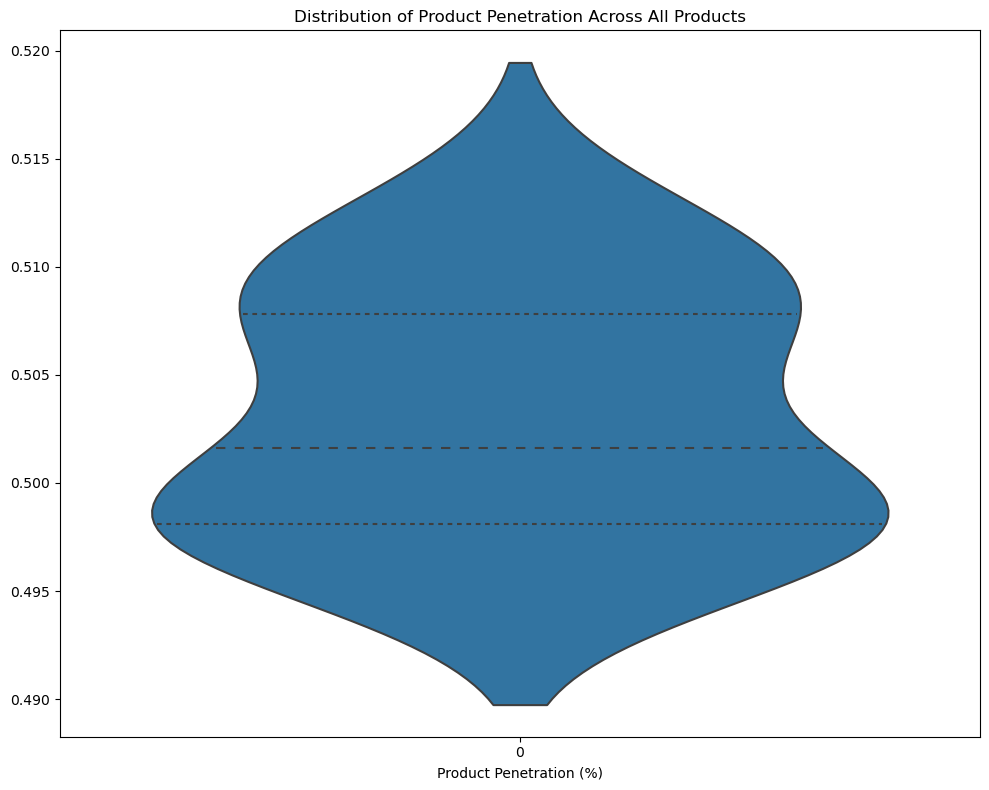

In [128]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=product_penetration['product_penetration'], inner="quartile", linewidth=1.5)
plt.xlabel('Product Penetration (%)')
plt.title('Distribution of Product Penetration Across All Products')
plt.tight_layout()
plt.show()